# Neural Network from Scratch

![alt text](a.jpg "Title")

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.array(([3,5], [5,1], [5,2]), dtype=float)
Y = np.array(([75], [82], [93]), dtype=float)


In [27]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [ 5.,  2.]])

In [28]:
Y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [33]:
class NeuralNetwork(object):
    def __init__(self,X,y,num_passes=5):
        """
        Initialising dimensions, weight and biases
        """
        self.X=X
        self.y=y
        self.num_passes=num_passes
        
        self.inputLayerDim = 2
        self.outputLayerDim = 1
        self.hiddenLayerDim = 5
        
        self.Wxh = np.random.randn(self.inputLayerDim,self.hiddenLayerDim)
        self.bh = np.zeros((1,self.hiddenLayerDim))
        
        self.Why = np.random.randn (self.hiddenLayerDim,self.outputLayerDim)
        self.by = np.zeros((1,self.outputLayerDim))
        
        
        self.alpha = 0.01
        
        
    def sigmoid(self,z):
        return 1 / (1+np.exp(-z))
    
    def forwardProp(self):
        self.z1 = np.dot(self.X,self.Wxh) + self.bh
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1,self.Why) + self.by
        self.yHat = self.sigmoid(self.z2)
        
        
    def sigmoidPrime(self,z):
         return np.exp(-z)/((1+np.exp(-z))**2)
        
    def backProp(self):
        """
        Multiply error by the input and derivative of sigmoid
        
        
        J = 1/2 (y-yh)2
        
        dJ/dW2 = dJ/dyh * dyh/dz2 * dz2/dw2
               = dJ/dyh * dyh/dw2
        
        dJ/dyh = -(y-yh)
        dyh/dz2 = sigprime
        dz2/dw2 = a1
        
        
        dJ/dw1 = dJ/dyh * dyh/dz2 *dz2/da1 * da1/dz1 * dz1/dw1
        dJ/dyh  = -(y-yh)
        dyh/dz2 = sigprime
        dz2/da1 = why
        da1/dz1 = sigprime
        dz1/dw1 = x
        
        """
        self.delta3 = np.multiply(-(self.y-self.yHat),self.sigmoidPrime(self.z2))
       
        self.dJdW2 = np.dot(self.a1.T, self.delta3)
        
        self.delta2 = np.dot(self.delta3,self.Why.T)*self.sigmoidPrime(self.z1)
        self.dJdW1 = np.dot(self.X.T, self.delta2) 
        
       
        self.Wxh += -self.alpha * self.dJdW1
        self.Why += -self.alpha * self.dJdW2
    
                     
    def cost_function(self):
        
        self.J = 0.5*sum((self.y-self.yHat)**2)
        return self.J
        
        
        
    def optimise(self):
        self.i=[]
        self.c=[]
        for i in range(self.num_passes):
            self.forwardProp()
            self.backProp()
            self.cost = self.cost_function()
            self.i.append(i)
            self.c.append(self.cost)
            
        
        
    def PlotCostFunction(self):
        plt.plot(self.i,self.c)
   
        
        

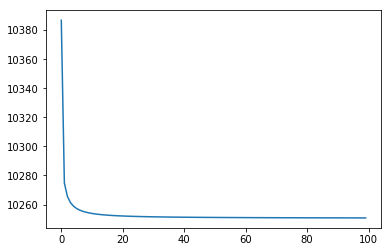

In [34]:
NN=NeuralNetwork(X,Y,100)
NN.optimise()
NN.PlotCostFunction()